<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Explore-The-Dataset" data-toc-modified-id="Challenge-1---Explore-The-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Explore The Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-data-from-an-bird's-eye-view." data-toc-modified-id="Explore-the-data-from-an-bird's-eye-view.-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the data from an bird's-eye view.</a></span></li><li><span><a href="#Next,-evaluate-if-the-columns-in-this-dataset-are-strongly-correlated." data-toc-modified-id="Next,-evaluate-if-the-columns-in-this-dataset-are-strongly-correlated.-2.0.0.2"><span class="toc-item-num">2.0.0.2&nbsp;&nbsp;</span>Next, evaluate if the columns in this dataset are strongly correlated.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Remove-Column-Collinearity." data-toc-modified-id="Challenge-2---Remove-Column-Collinearity.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Remove Column Collinearity.</a></span></li><li><span><a href="#Challenge-3---Handle-Missing-Values" data-toc-modified-id="Challenge-3---Handle-Missing-Values-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Handle Missing Values</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-the-cells-below,-handle-the-missing-values-from-the-dataset.-Remember-to-comment-the-rationale-of-your-decisions." data-toc-modified-id="In-the-cells-below,-handle-the-missing-values-from-the-dataset.-Remember-to-comment-the-rationale-of-your-decisions.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.</a></span></li><li><span><a href="#Again,-examine-the-number-of-missing-values-in-each-column." data-toc-modified-id="Again,-examine-the-number-of-missing-values-in-each-column.-4.0.0.2"><span class="toc-item-num">4.0.0.2&nbsp;&nbsp;</span>Again, examine the number of missing values in each column.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Handle-WHOIS_*-Categorical-Data" data-toc-modified-id="Challenge-4---Handle-WHOIS_*-Categorical-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Handle <code>WHOIS_*</code> Categorical Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-the-cells-below,-fix-the-country-values-as-intructed-above." data-toc-modified-id="In-the-cells-below,-fix-the-country-values-as-intructed-above.-5.0.0.1"><span class="toc-item-num">5.0.0.1&nbsp;&nbsp;</span>In the cells below, fix the country values as intructed above.</a></span></li><li><span><a href="#If-a-limited-number-of-values-account-for-the-majority-of-data,-we-can-retain-these-top-values-and-re-label-all-other-rare-values." data-toc-modified-id="If-a-limited-number-of-values-account-for-the-majority-of-data,-we-can-retain-these-top-values-and-re-label-all-other-rare-values.-5.0.0.2"><span class="toc-item-num">5.0.0.2&nbsp;&nbsp;</span>If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.</a></span></li><li><span><a href="#After-verifying,-now-let's-keep-the-top-10-values-of-the-column-and-re-label-other-columns-with-OTHER." data-toc-modified-id="After-verifying,-now-let's-keep-the-top-10-values-of-the-column-and-re-label-other-columns-with-OTHER.-5.0.0.3"><span class="toc-item-num">5.0.0.3&nbsp;&nbsp;</span>After verifying, now let's keep the top 10 values of the column and re-label other columns with <code>OTHER</code>.</a></span></li><li><span><a href="#In-the-next-cell,-drop-['WHOIS_STATEPRO',-'WHOIS_REGDATE',-'WHOIS_UPDATED_DATE']." data-toc-modified-id="In-the-next-cell,-drop-['WHOIS_STATEPRO',-'WHOIS_REGDATE',-'WHOIS_UPDATED_DATE'].-5.0.0.4"><span class="toc-item-num">5.0.0.4&nbsp;&nbsp;</span>In the next cell, drop <code>['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']</code>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-5---Handle-Remaining-Categorical-Data-&amp;-Convert-to-Ordinal" data-toc-modified-id="Challenge-5---Handle-Remaining-Categorical-Data-&amp;-Convert-to-Ordinal-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Handle Remaining Categorical Data &amp; Convert to Ordinal</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#URL-is-easy.-We'll-simply-drop-it-because-it-has-too-many-unique-values-that-there's-no-way-for-us-to-consolidate." data-toc-modified-id="URL-is-easy.-We'll-simply-drop-it-because-it-has-too-many-unique-values-that-there's-no-way-for-us-to-consolidate.-6.0.0.1"><span class="toc-item-num">6.0.0.1&nbsp;&nbsp;</span><code>URL</code> is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.</a></span></li><li><span><a href="#Print-the-unique-value-counts-of-CHARSET.-You-see-there-are-only-a-few-unique-values.-So-we-can-keep-it-as-it-is." data-toc-modified-id="Print-the-unique-value-counts-of-CHARSET.-You-see-there-are-only-a-few-unique-values.-So-we-can-keep-it-as-it-is.-6.0.0.2"><span class="toc-item-num">6.0.0.2&nbsp;&nbsp;</span>Print the unique value counts of <code>CHARSET</code>. You see there are only a few unique values. So we can keep it as it is.</a></span></li><li><span><a href="#Before-you-think-of-your-own-solution,-don't-read-the-instructions-that-come-next." data-toc-modified-id="Before-you-think-of-your-own-solution,-don't-read-the-instructions-that-come-next.-6.0.0.3"><span class="toc-item-num">6.0.0.3&nbsp;&nbsp;</span>Before you think of your own solution, don't read the instructions that come next.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-6---Modeling,-Prediction,-and-Evaluation" data-toc-modified-id="Challenge-6---Modeling,-Prediction,-and-Evaluation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Modeling, Prediction, and Evaluation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-this-lab,-we-will-try-two-different-models-and-compare-our-results." data-toc-modified-id="In-this-lab,-we-will-try-two-different-models-and-compare-our-results.-7.0.0.1"><span class="toc-item-num">7.0.0.1&nbsp;&nbsp;</span>In this lab, we will try two different models and compare our results.</a></span></li><li><span><a href="#Our-second-algorithm-is-is-DecisionTreeClassifier" data-toc-modified-id="Our-second-algorithm-is-is-DecisionTreeClassifier-7.0.0.2"><span class="toc-item-num">7.0.0.2&nbsp;&nbsp;</span>Our second algorithm is is DecisionTreeClassifier</a></span></li><li><span><a href="#We'll-create-another-DecisionTreeClassifier-model-with-max_depth=5." data-toc-modified-id="We'll-create-another-DecisionTreeClassifier-model-with-max_depth=5.-7.0.0.3"><span class="toc-item-num">7.0.0.3&nbsp;&nbsp;</span>We'll create another DecisionTreeClassifier model with max_depth=5.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Bonus-Challenge---Feature-Scaling" data-toc-modified-id="Bonus-Challenge---Feature-Scaling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge - Feature Scaling</a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [156]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

Your features will be:

+ URL: it is the anonymous identification of the URL analyzed in the study
+ URL_LENGTH: it is the number of characters in the URL
+ NUMBER_SPECIAL_CHARACTERS: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”
+ CHARSET: it is a categorical value and its meaning is the character encoding standard (also called character set).
+ SERVER: it is a categorical value and its meaning is the operative system of the server got from the packet response.
+ CONTENT_LENGTH: it represents the content size of the HTTP header.
+ WHOIS_COUNTRY: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).
+ WHOIS_STATEPRO: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).
+ WHOIS_REGDATE: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM
+ WHOIS_UPDATED_DATE: Through the Whois we got the last update date from the server analyzed
+ TCP_CONVERSATION_EXCHANGE: This variable is the number of TCP packets exchanged between the server and our honeypot client
+ DIST_REMOTE_TCP_PORT: it is the number of the ports detected and different to TCP
+ REMOTE_IPS: this variable has the total number of IPs connected to the honeypot
+ APP_BYTES: this is the number of bytes transfered
+ SOURCE_APP_PACKETS: packets sent from the honeypot to the server
+ REMOTE_APP_PACKETS: packets received from the server
+ APP_PACKETS: this is the total number of IP packets generated during the communication between the honeypot and the server
+ DNS_QUERY_TIMES: this is the number of DNS packets generated during the communication between the honeypot and the server
+ TYPE: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:


*Source: [kaggle](https://www.kaggle.com/viratkothari/malicious-and-benign-websites-classification)*

In [157]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [158]:
# What the dataset looks like?
websites.describe()

websites.head()




,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [159]:
# What are the data types?
# Display data types of all columns
print(websites.dtypes)  

 
              


URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object


In [160]:
# Which columns contain the features of the websites?

websites_features = websites.drop(columns=['Type'])

# Display the feature columns
print("Feature columns:")
print(websites_features.columns.tolist())

# Count of feature columns
print(f"\nNumber of feature columns: {len(websites_features.columns)}")
                

Feature columns:
['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER', 'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES']

Number of feature columns: 20


In [161]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
print(f"\nThe column that contains the target to predict is : {websites.columns[-1]}")

# What is the code standing for benign vs malicious websites?
benign_code = 0
malicious_code = 1

print(f"\nCode for benign websites: {benign_code}")
print(f"Code for malicious websites: {malicious_code}")


The column that contains the target to predict is : Type

Code for benign websites: 0
Code for malicious websites: 1


In [162]:
# 0 for bening 1 for maliciuos websites
benign_code = 0
malicious_code = 1

print(f"\nCode for benign websites: {benign_code}")
print(f"Code for malicious websites: {malicious_code}")



Code for benign websites: 0
Code for malicious websites: 1


In [163]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
# Identify categorical columns
categorical_columns = websites.select_dtypes(include=['object']).columns

print("\nCategorical columns:")
print(categorical_columns)


Categorical columns:
Index(['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO',
       'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'],
      dtype='object')


#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

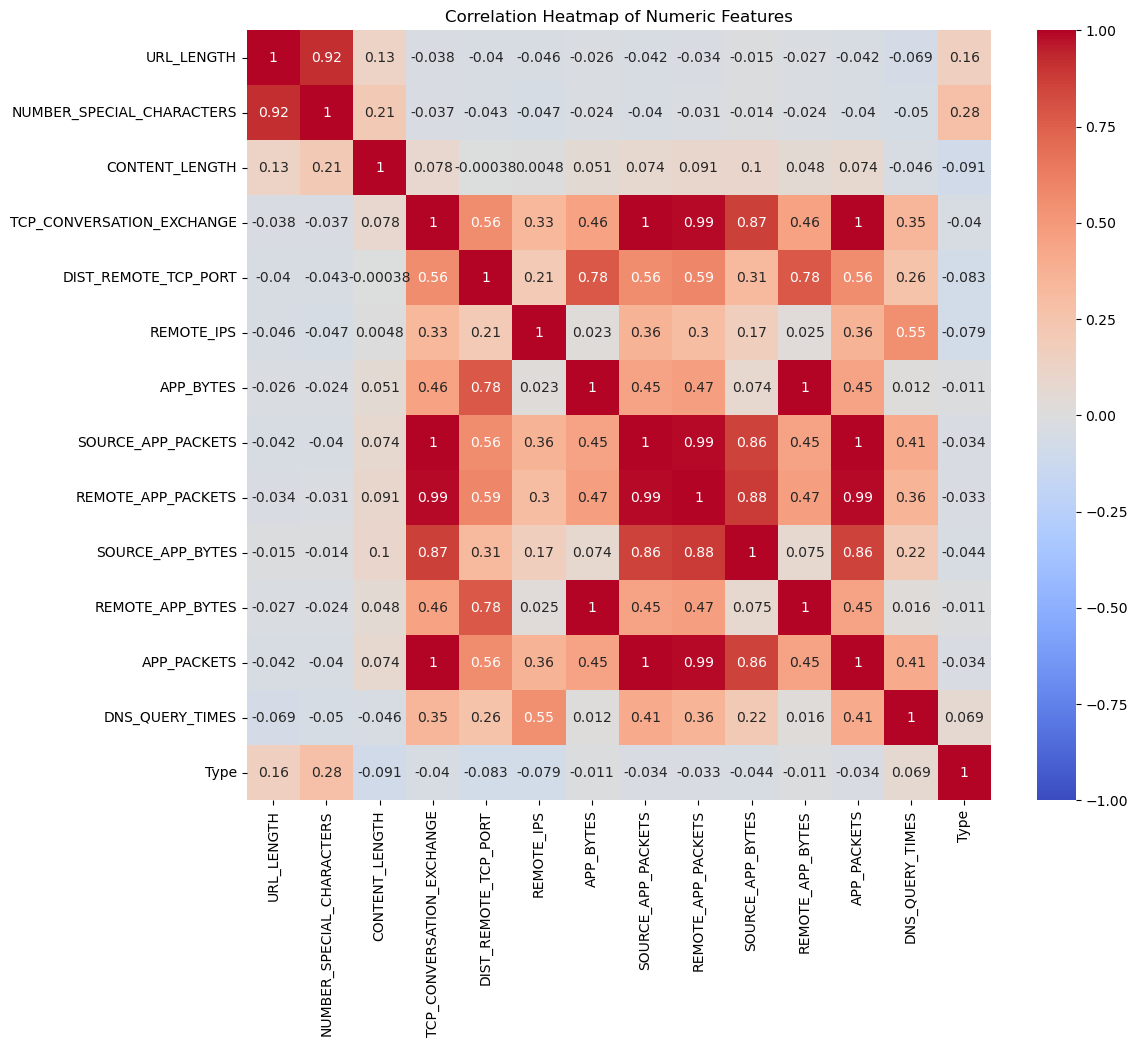

Highly correlated columns (correlation > 0.9):
URL_LENGTH and NUMBER_SPECIAL_CHARACTERS: 0.92
TCP_CONVERSATION_EXCHANGE and SOURCE_APP_PACKETS: 1.00
TCP_CONVERSATION_EXCHANGE and REMOTE_APP_PACKETS: 0.99
TCP_CONVERSATION_EXCHANGE and APP_PACKETS: 1.00
APP_BYTES and REMOTE_APP_BYTES: 1.00
SOURCE_APP_PACKETS and REMOTE_APP_PACKETS: 0.99
SOURCE_APP_PACKETS and APP_PACKETS: 1.00
REMOTE_APP_PACKETS and APP_PACKETS: 0.99

Columns that might need to be removed due to high collinearity:
- APP_BYTES (highly correlated with SOURCE_APP_BYTES and REMOTE_APP_BYTES)
- APP_PACKETS (highly correlated with SOURCE_APP_PACKETS and REMOTE_APP_PACKETS)
- REMOTE_APP_BYTES (highly correlated with SOURCE_APP_BYTES)


In [164]:
# Your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for correlation analysis
numeric_columns = websites.select_dtypes(include=['int64', 'float64']).columns

# Create correlation matrix
correlation_matrix = websites[numeric_columns].corr()

# Create heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Identify highly correlated columns (correlation > 0.9)
high_corr = np.where(np.abs(correlation_matrix) > 0.9)
high_corr_list = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

print("Highly correlated columns (correlation > 0.9):")
for pair in high_corr_list:
    print(f"{pair[0]} and {pair[1]}: {correlation_matrix.loc[pair[0], pair[1]]:.2f}")

# Comment on which columns might need to be removed
print("\nColumns that might need to be removed due to high collinearity:")
print("- APP_BYTES (highly correlated with SOURCE_APP_BYTES and REMOTE_APP_BYTES)")
print("- APP_PACKETS (highly correlated with SOURCE_APP_PACKETS and REMOTE_APP_PACKETS)")
print("- REMOTE_APP_BYTES (highly correlated with SOURCE_APP_BYTES)")


### This is an example to know the feacture importance using a ML model

In [165]:
#! pip install xgboost
import xgboost as xgb

# Create an XGBoost classifier
xgb = xgb.XGBClassifier()


In [166]:
X = websites._get_numeric_data().drop('Type', axis=1)
y = websites.Type

In [167]:
xgb.fit(X,y)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [168]:
sort_idx = xgb.feature_importances_.argsort()

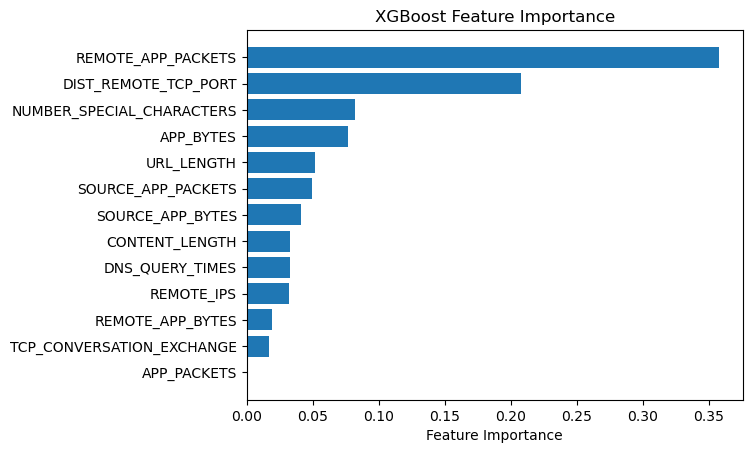

In [169]:
plt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show();


    In the previous plot we can see the feactures with lower weight in the dataset.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

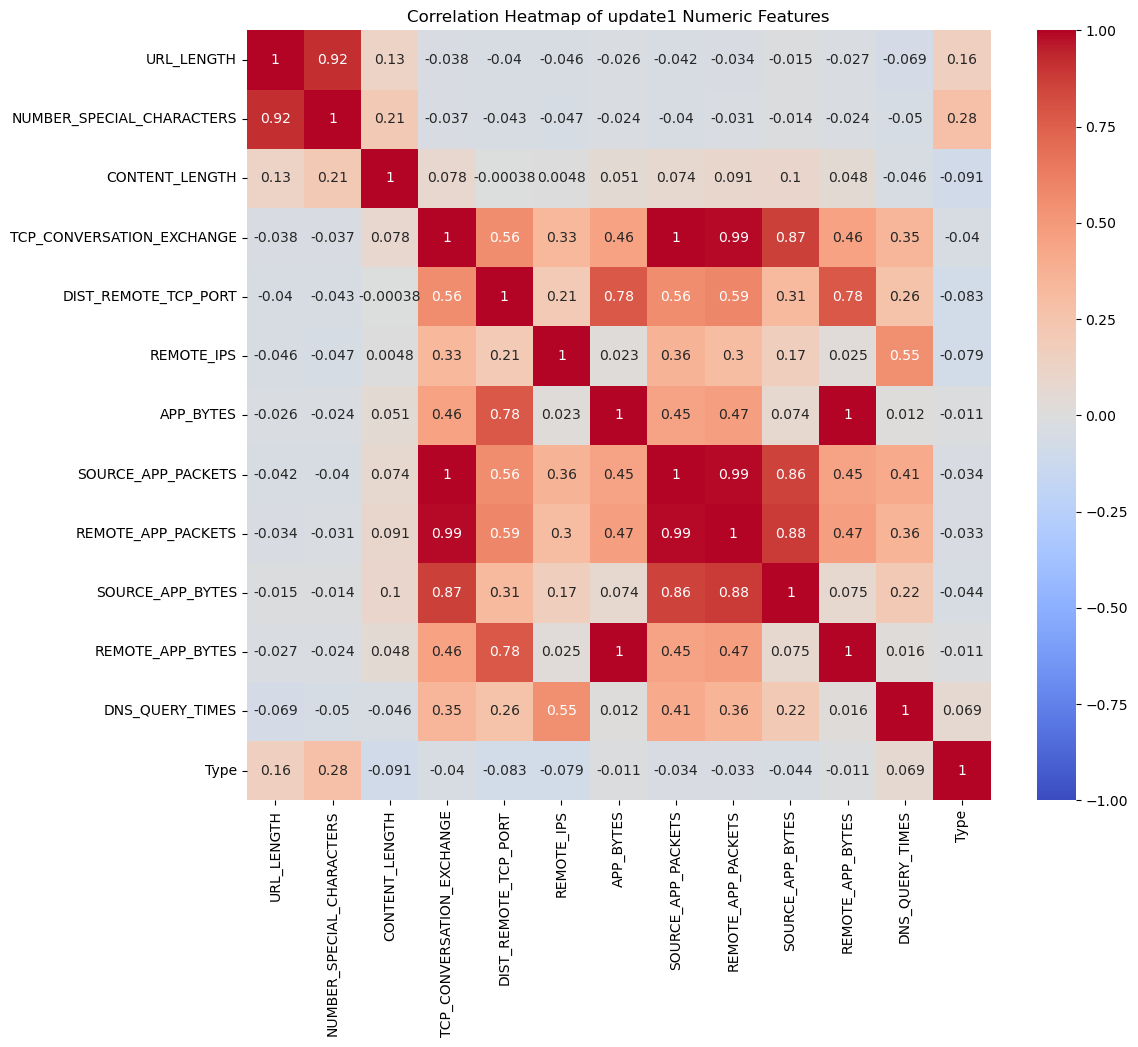

In [170]:
# Your code here

numeric_columns_update1 = numeric_columns.drop(['APP_PACKETS'])

# Create correlation matrix
correlation_matrix_update1 = websites[numeric_columns_update1].corr()

# Create heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_update1, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of update1 Numeric Features')
plt.show()





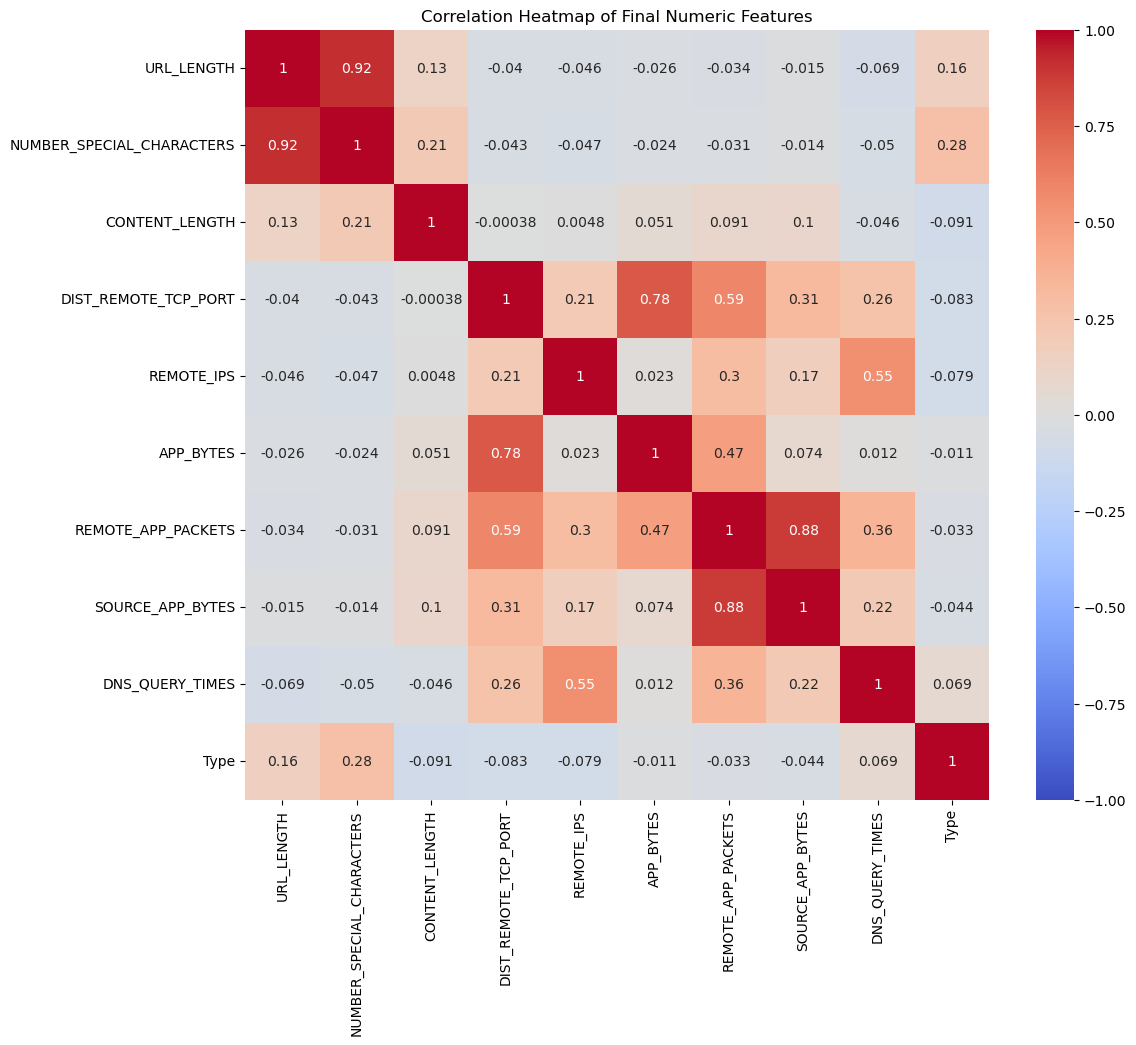

Final set of numeric columns:
['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'DNS_QUERY_TIMES', 'Type']


In [171]:
# REMOVE THE 4 COLUMNS WITH MORE COLLINEARITY
numeric_columns_final = numeric_columns.drop(['APP_PACKETS','REMOTE_APP_BYTES','TCP_CONVERSATION_EXCHANGE','SOURCE_APP_PACKETS'])

correlation_matrix_final = websites[numeric_columns_final].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_final, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Final Numeric Features')
plt.show()

# Print the final set of numeric columns
print("Final set of numeric columns:")
print(numeric_columns_final.tolist())




# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [172]:
# Your code here
missing_values = websites.isnull().sum()

print("Missing values in each column:")
print(missing_values)



Missing values in each column:
URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


In [173]:
# Firts we will drop the columns with more than 50% of missing data
# Calculate the percentage of missing values
missing_percentage = (missing_values / len(websites)) * 100

print("Missing percentage for each column:")
print(missing_percentage)

# Check if any columns exceed 50% missing data
columns_to_drop = missing_percentage[missing_percentage > 50].index.tolist()

if columns_to_drop:
    print("\nColumns to drop (>50% missing):", columns_to_drop)
    websites_cleaned = websites.drop(columns=columns_to_drop)
else:
    print("\nNo columns have more than 50% missing data.")
    websites_cleaned = websites.copy()

print("\nRemaining columns:")
print(websites_cleaned.columns.tolist())



Missing percentage for each column:
URL                           0.000000
URL_LENGTH                    0.000000
NUMBER_SPECIAL_CHARACTERS     0.000000
CHARSET                       0.393038
SERVER                        9.882089
CONTENT_LENGTH               45.592364
WHOIS_COUNTRY                17.181359
WHOIS_STATEPRO               20.325660
WHOIS_REGDATE                 7.130825
WHOIS_UPDATED_DATE            7.804604
TCP_CONVERSATION_EXCHANGE     0.000000
DIST_REMOTE_TCP_PORT          0.000000
REMOTE_IPS                    0.000000
APP_BYTES                     0.000000
SOURCE_APP_PACKETS            0.000000
REMOTE_APP_PACKETS            0.000000
SOURCE_APP_BYTES              0.000000
REMOTE_APP_BYTES              0.000000
APP_PACKETS                   0.000000
DNS_QUERY_TIMES               0.056148
Type                          0.000000
dtype: float64

No columns have more than 50% missing data.

Remaining columns:
['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SE

In [174]:
# Now we will drop the rows with missing data
# Drop rows with missing data
websites_cleaned = websites_cleaned.dropna()

# Verify the number of rows dropped
print(f"Number of rows before dropping: {len(websites)}")
print(f"Number of rows after dropping: {len(websites_cleaned)}")




Number of rows before dropping: 1781
Number of rows after dropping: 636


#### Again, examine the number of missing values in each column. 

    If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [175]:
# Examine missing values in each column

# Reset the index after dropping rows
websites_cleaned = websites_cleaned.reset_index(drop=True)

print("\nMissing values after cleaning:")
print(websites_cleaned.isnull().sum())


Missing values after cleaning:
URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [176]:
websites.WHOIS_COUNTRY.value_counts()




WHOIS_COUNTRY
US                1103
CA                  84
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
UK                  10
CN                  10
IN                  10
FR                   9
CZ                   9
NL                   6
CH                   6
[u'GB'; u'UK']       5
KR                   5
PH                   4
BS                   4
ru                   4
AT                   4
HK                   3
us                   3
TR                   3
BE                   3
DE                   3
SC                   3
KY                   3
SE                   3
BR                   2
UY                   2
Cyprus               2
SI                   2
UA                   2
RU                   2
IL                   2
NO                   2
KG                   2
TH                   1
se                   1
LV                   1
LU                   1
United Kingdom       1
UG                  

In [177]:
# Your code here
good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.map(lambda x: good_country.get(x, x))


In [178]:
websites.WHOIS_COUNTRY.unique()

array([nan, 'US', 'SC', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT', 'CZ',
       'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [179]:
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(15,15))
    return plt.show()

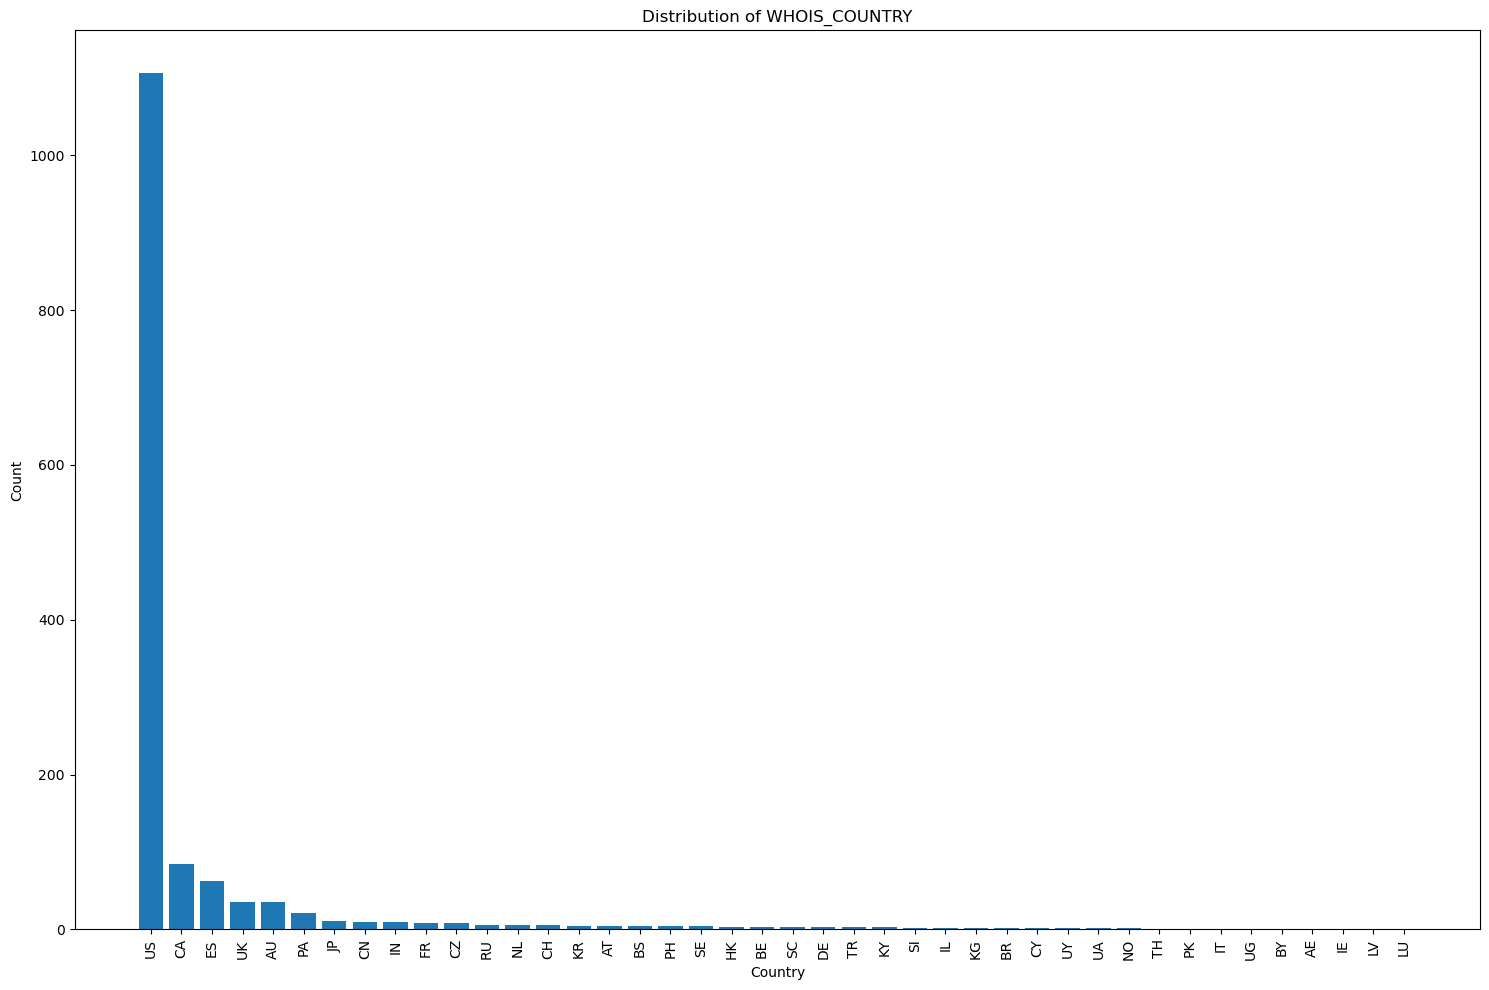

In [180]:
import matplotlib.pyplot as plt

# Convert to regular Series
country_counts = websites.WHOIS_COUNTRY.value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Sort by count in descending order
country_counts = country_counts.sort_values('Count', ascending=False)

# Plot
plt.figure(figsize=(15, 10))
plt.bar(country_counts['Country'], country_counts['Count'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of WHOIS_COUNTRY')
plt.tight_layout()
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [181]:
# Your code here
# Get the top 10 countries
top_10_countries = websites['WHOIS_COUNTRY'].value_counts().nlargest(10).index.tolist()

# Create a function to relabel countries
def relabel_country(country):
    return country if country in top_10_countries else 'OTHER'

# Apply the function to relabel countries
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(relabel_country)

# Verify the result
print(websites['WHOIS_COUNTRY'].value_counts())


WHOIS_COUNTRY
US       1106
OTHER     397
CA         84
ES         63
UK         35
AU         35
PA         21
JP         11
IN         10
CN         10
FR          9
Name: count, dtype: int64


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [182]:
# Your code here
# Drop the specified columns
websites = websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1)

# Verify the columns have been dropped
print(websites.columns)


Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [183]:
# Your code here
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [184]:
# Your code here
# Drop the 'URL' column
websites = websites.drop('URL', axis=1)

# Verify that the 'URL' column has been dropped
print(websites.columns)


Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [185]:
# Your code here
# Print the unique value counts of CHARSET
charset_counts = websites['CHARSET'].value_counts()
print("Unique value counts of CHARSET:")
print(charset_counts)


Unique value counts of CHARSET:
CHARSET
UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
windows-1251      1
ISO-8859          1
windows-1252      1
Name: count, dtype: int64


`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [186]:
# Your code here
# Print unique values of SERVER column
server_values = websites['SERVER'].unique()
print("Unique values in SERVER column:")
print(server_values)

# Count occurrences of each unique value
server_counts = websites['SERVER'].value_counts()
print("\nValue counts for SERVER column:")
print(server_counts)


Unique values in SERVER column:
['nginx' 'Apache/2.4.10' 'Microsoft-HTTPAPI/2.0' nan 'Apache/2'
 'nginx/1.10.1' 'Apache' 'Apache/2.2.15 (Red Hat)'
 'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'openresty/1.11.2.1' 'Apache/2.2.22' 'Apache/2.4.7 (Ubuntu)'
 'nginx/1.12.0'
 'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'Oracle-iPlanet-Web-Server/7.0' 'cloudflare-nginx' 'nginx/1.6.2'
 'openresty' 'Heptu web server' 'Pepyaka/1.11.3' 'nginx/1.8.0'
 'nginx/1.10.1 + Phusion Passenger 5.0.30' 'Apache/2.2.29 (Amazon)'
 'Microsoft-IIS/7.5' 'LiteSpeed'
 'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4' 'tsa_c'
 'Apache/2.2.0 (Fedora)' 'Apache/2.2.22 (Debian)' 'Apache/2.2.15 (CentOS)'
 'Apache/2.4.25' 'Apache/2.4.25 (Amazon) PHP/7.0.14' 'GSE'
 'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4'
 'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips' 'Apache/2.2.22 (Ubuntu)'
 'Tengine'
 'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [187]:
# Count `SERVER` value counts here

# Define a function to categorize server types
def categorize_server(server):
    if pd.isna(server):
        return 'Other'
    server = str(server).lower()
    if 'microsoft' in server:
        return 'Microsoft'
    elif 'apache' in server:
        return 'Apache'
    elif 'nginx' in server:
        return 'nginx'
    else:
        return 'Other'

# Apply the categorization function to the SERVER column
websites['SERVER'] = websites['SERVER'].apply(categorize_server)

# Count and print the value counts of the updated SERVER column
server_counts = websites['SERVER'].value_counts()
print("Updated SERVER value counts:")
print(server_counts)


Updated SERVER value counts:
SERVER
Apache       643
Other        504
nginx        436
Microsoft    198
Name: count, dtype: int64


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [188]:
# Your code here
# Convert categorical columns to dummy variables
categorical_columns = ['CHARSET', 'SERVER', 'WHOIS_COUNTRY']
website_dummy = pd.get_dummies(websites, columns=categorical_columns, drop_first=True)

# Verify the shape of the new dataframe
print("Shape of website_dummy:", website_dummy.shape)

# Display the first few rows and data types of the new dataframe
print("\nFirst few rows of website_dummy:")
print(website_dummy.head())
print("\nData types of website_dummy:")
print(website_dummy.dtypes)


Shape of website_dummy: (1781, 34)

First few rows of website_dummy:
   URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH  \
0          16                          7           263.0   
1          16                          6         15087.0   
2          16                          6           324.0   
3          17                          6           162.0   
4          17                          6        124140.0   

   TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
0                          7                     0           2        700   
1                         17                     7           4       1230   
2                          0                     0           0          0   
3                         31                    22           3       3812   
4                         57                     2           5       4278   

   SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  SOURCE_APP_BYTES  ...  \
0                   9                  

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [189]:
# Your code here
# Inspect website_dummy
print("Shape of website_dummy:", website_dummy.shape)
print("\nData types of website_dummy:")
print(website_dummy.dtypes)

# Check for any remaining categorical columns
categorical_columns = website_dummy.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    print("\nWarning: The following categorical columns still exist:")
    print(categorical_columns)
else:
    print("\nNo categorical columns remain in the dataset.")

# Display the first few rows of the dataframe
print("\nFirst few rows of website_dummy:")
print(website_dummy.head())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(website_dummy.describe())


Shape of website_dummy: (1781, 34)

Data types of website_dummy:
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CONTENT_LENGTH               float64
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
CHARSET_ISO-8859-1              bool
CHARSET_UTF-8                   bool
CHARSET_iso-8859-1              bool
CHARSET_us-ascii                bool
CHARSET_utf-8                   bool
CHARSET_windows-1251            bool
CHARSET_windows-1252            bool
SERVER_Microsoft                bool
SERVER_Other                    bool
SERVER_nginx                    bool
WHOIS_COUNTRY_CA                bool
WHOIS_COUN

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [190]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = website_dummy.drop('Type', axis=1)
y = website_dummy['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)





Shape of X_train: (1424, 33)
Shape of X_test: (357, 33)
Shape of y_train: (1424,)
Shape of y_test: (357,)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [191]:
# Your code here:

# Import LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logistic_model = LogisticRegression(random_state=42)

 


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [192]:
# Your code here:

numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

 
# Fit the logistic regression model to the training data
logistic_model.fit(X_train_numeric, y_train)

# Make predictions on the test set

y_pred = logistic_model.predict(X_test_numeric)





ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [ ]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Confusion Matrix:
[[116   1]
 [  6   5]]
Accuracy Score: 0.9453


What are your thoughts on the performance of the model? Write your conclusions below.

### Your conclusions here:
    The model is working fine but it have many errors in Type 2, it says that the model predict a non malicious web like a malicious web


#### Our second algorithm is is DecisionTreeClassifier

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `DecisionTreeClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where max_depth=3

In [ ]:
# Your code here:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier with max_depth=3
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit the model using the training data
dt_classifier.fit(X_train_numeric, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test_numeric)

# Calculate and print the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix (Decision Tree, max_depth=3):")
print(conf_matrix_dt)

# Calculate and print the accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy Score (Decision Tree, max_depth=3): {accuracy_dt:.4f}")



Confusion Matrix (Decision Tree, max_depth=3):
[[116   1]
 [ 11   0]]
Accuracy Score (Decision Tree, max_depth=3): 0.9062


To test your model, compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)

In [ ]:
# Your code here:

# Compute predicted probabilities
y_pred_proba = dt_classifier.predict_proba(X_test_numeric)[:, 1]

# Convert probabilities to binary predictions using 0.5 threshold
y_pred_binary = (y_pred_proba >= 0.5).astype(int)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix (Decision Tree, max_depth=3, threshold=0.5):")
print(conf_matrix)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy Score (Decision Tree, max_depth=3, threshold=0.5): {accuracy:.4f}")


Confusion Matrix (Decision Tree, max_depth=3, threshold=0.5):
[[116   1]
 [ 11   0]]
Accuracy Score (Decision Tree, max_depth=3, threshold=0.5): 0.9062


#### We'll create another DecisionTreeClassifier model with max_depth=5. 
Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [ ]:
# Your code here:

# Create a new DecisionTreeClassifier with max_depth=5
dt_classifier_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model
dt_classifier_5.fit(X_train_numeric, y_train)

# Make predictions
y_pred_dt_5 = dt_classifier_5.predict(X_test_numeric)

# Calculate and print the confusion matrix
conf_matrix_dt_5 = confusion_matrix(y_test, y_pred_dt_5)
print("Confusion Matrix (Decision Tree, max_depth=5):")
print(conf_matrix_dt_5)

# Calculate and print the accuracy score
accuracy_dt_5 = accuracy_score(y_test, y_pred_dt_5)
print(f"Accuracy Score (Decision Tree, max_depth=5): {accuracy_dt_5:.4f}")

# Compare with the previous model (max_depth=3)
print("\nComparison:")
print(f"Accuracy (max_depth=3): {accuracy_dt:.4f}")
print(f"Accuracy (max_depth=5): {accuracy_dt_5:.4f}")
print(f"Improvement: {accuracy_dt_5 - accuracy_dt:.4f}")



Confusion Matrix (Decision Tree, max_depth=5):
[[113   4]
 [  9   2]]
Accuracy Score (Decision Tree, max_depth=5): 0.8984

Comparison:
Accuracy (max_depth=3): 0.9062
Accuracy (max_depth=5): 0.8984
Improvement: -0.0078


Did you see an improvement in the confusion matrix when increasing max_depth to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

### Your conclusions here:


<!-- Add your conclusion here -->

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here
# Import necessary libraries
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize RobustScaler
scaler = RobustScaler()

# Fit and transform X_train
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Transform X_test
X_test_scaled = scaler.transform(X_test_numeric)

# Initialize and train logistic regression model on scaled data
lr_scaled = LogisticRegression(random_state=42)
lr_scaled.fit(X_train_scaled, y_train)

# Make predictions on scaled test data
y_pred_scaled = lr_scaled.predict(X_test_scaled)

# Calculate accuracy score for scaled data
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Print results
print("Logistic Regression Results:")
print(f"Accuracy with original data: {accuracy:.4f}")
print(f"Accuracy with scaled data: {accuracy_scaled:.4f}")
print(f"Improvement: {accuracy_scaled - accuracy:.4f}")

# Compare with best previous model (Decision Tree with max_depth=5)
print("\nComparison with best previous model:")
print(f"Accuracy (Decision Tree, max_depth=5): {accuracy_dt_5:.4f}")
print(f"Accuracy (Logistic Regression with scaled data): {accuracy_scaled:.4f}")
print(f"Difference: {accuracy_scaled - accuracy_dt_5:.4f}")


Logistic Regression Results:
Accuracy with original data: 0.9453
Accuracy with scaled data: 0.9141
Improvement: -0.0312

Comparison with best previous model:
Accuracy (Decision Tree, max_depth=5): 0.8984
Accuracy (Logistic Regression with scaled data): 0.9141
Difference: 0.0156


## Comments:

Add your comments here: